In [1]:
from orphics import cosmology

In [2]:
import numpy as np
from orphics import maps, cosmology,io,stats
from scipy import optimize
import cosmo_cleaner
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
#from IPython.display import set_matplotlib_formats set_matplotlib_formats('retina')
csfont = {'fontname':'Latin Modern Roman'}
font = font_manager.FontProperties(family='Latin Modern Roman',style='normal', size = 8)

In [4]:
import camb
from cosmo_cleaner import cosmology

In [7]:
defaultCosmology = {'omch2': 0.1198
                    ,'ombh2': 0.02225
                    ,'H0': 67.3
                    ,'ns': 0.9645
                    ,'As': 2.2e-9
                    ,'mnu': 0.06
                    ,'w0': -1.0
                    ,'tau':0.06
                    ,'nnu':3.046
                    ,'wa': 0.,'bias':2,'A_l':1}


nz = 1000
kmax = 10
zmin = 0.
ells=np.arange(2000)

pars = camb.CAMBparams()
pars.set_dark_energy(w=defaultCosmology['w0'],wa = defaultCosmology['wa'], dark_energy_model = 'ppf')
pars.set_cosmology(H0=defaultCosmology['H0'], cosmomc_theta = None,ombh2=defaultCosmology['ombh2'], 
               omch2=defaultCosmology['omch2'], mnu=defaultCosmology['mnu'], tau = defaultCosmology['tau'],
               nnu = defaultCosmology['nnu'], num_massive_neutrinos = 3)
#pars.NonLinear = model.NonLinear_both
pars.InitPower.set_params(ns=defaultCosmology['ns'],As=defaultCosmology['As'])

results = camb.get_results(pars)

In [12]:
default=cosmology.cosmology(nz,kmax,zmin,ells,defaultCosmology,pars,results)

In [16]:
default.bias

2

In [15]:
clgg=default.get_clgg(1,0.5)

In [17]:
clgg0=clgg/default.bias**2

In [23]:
derclgg=2*default.bias*clgg0

In [32]:
der=cosmology.derivative_parameter(ells,1,0.5,defaultCosmology,'bias',delta=0.00005)


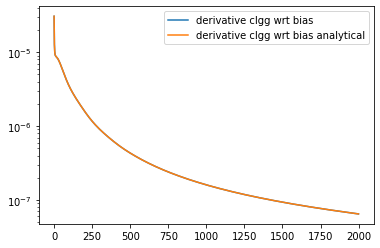

In [34]:
plt.plot(der[0],label='derivative clgg wrt bias')
plt.semilogy(derclgg*2,label='derivative clgg wrt bias analytical')
plt.legend()
#plt.plot(der[2],label='clkk')
#plt.plot(der[1],label='clgk')

In [6]:
cosmologyw,pars,res=cosmology.get_cosmology_var(defaultCosmology,'nnu',0.0005)

In [46]:
nz = 1000
kmax = 10
zmin = 0.
ells=np.arange(2000)
a=cosmology.cosmology(nz,kmax,zmin,ells,cosmologyw[0],pars[0],res[0])

In [47]:
b=cosmology.cosmology(nz,kmax,zmin,ells,cosmologyw[1],pars[1],res[1])

In [24]:
derclkk0005=(a.get_clgg(2,1,0.5,lmax=2000)-b.get_clgg(2,1,0.5,lmax=2000))/(2*0.0005*defaultCosmology['omch2'])

NameError: name 'a' is not defined

In [25]:
plt.semilogy(-derclkk0005,'--')
plt.semilogy(derclkk0005)

NameError: name 'derclkk0005' is not defined

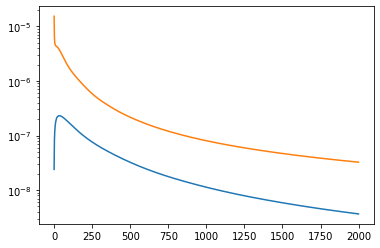

In [28]:
plt.plot(a.get_clkk())
plt.semilogy(a.get_clgg(2,1,0.5,lmax=2000))

In [14]:
clgg=get_clgg(2,zs,1,0.5,lmax=2000)

In [21]:
clgg1=get_clgg(2,zs,1,0.5,lmax=2000)